# Wine Quality Prediction

## Technology and Resources Used

**Python Version**: 3.7.7

## Table of Contents
1) [Define the Problem](#1.-Define-the-Problem)<br>
2) [Gather the Data](#2.-Data-Set-Information)<br>
3) [Prepare Data for Consumption](#3.-Prepare-Data-for-Consumption)<br>
4) [Data Cleaning](#4.-Data-Cleaning)<br>
5) [Data Exploration](#5.-Data-Exploration)<br>
6) [Feature Engineering](#6.-Feature-Engineering)<br>
7) [Model Building](#7.-Model-Building)<br>
8) [Hyperparameter Tuning](#8.-More-Hyperparameter-Tuning)<br>
9) [End](#END)<br>

## 1. Define the Problem
Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests. In this study we evaluate the quality grade of Portugese white wine.
The Solution proposed classifies the white into four categories namely:
1. Excellent Wine - Cat 4
2. Very Good wine - Cat 3
3. Fairly good Wine - Cat 2
4. Bad Wine - Cat 1

## 2. Data Set Information
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods..

![image.png](attachment:image.png)

**Source:**: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Available at: https://archive.ics.uci.edu/ml/datasets/wine+quality

## 3. Prepare Data for Consumption


### 3.1 Import Libraries
The following code is written in Python 3.7.7. Below is the list of libraries used.

In [3]:
import numpy as np 
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%config Completer.use_jedi = False # to activate autocomplete assistance, disable jedi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  


### 3.2 Load Data Modeling Libraries
These are the most common machine learning and data visualization libraries.

In [4]:
# Model Algorithms
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Model Helpers
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

### 3.3 Data dictionary
The data dictionary for the data set is as follows:<br>
Input variables (based on physicochemical tests):
1. - fixed acidity
2. - volatile acidity
3. - citric acid
4. - residual sugar
5. - chlorides
6. - free sulfur dioxide
7. - total sulfur dioxide
8. - density
9. - pH
10. - sulphates
11. - alcohol
Output variable (based on sensory data):
12. - quality (score between 0 and 10)

### 3.4 Greet the data

In [5]:
# read data set
# wine_data = pd.read_csv("Data set/winequality-white.csv",sep=";" , encoding= 'unicode_escape')

In [6]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [7]:
wine_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/winequality-white.csv',sep=";" , encoding= 'unicode_escape')

In [8]:
# get a peek at the top 5 rows of the data set
wine_data.head() #print(wine_data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
# understand the type of each column
print(wine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [10]:
# get information on the numerical columns for the data set
wine_data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## 4. Data Cleaning
The Data cleaning was seen to be instrumental in improving the quality of the modeling. Outliers were thus removed from the dataset.

### 4.1 IQR method

In [11]:
def remove_outliers_iqr(df):
    dataf = pd.DataFrame(df)
    quartile_1, quartile_3 = np.percentile(dataf, [5,95])

    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)

    #print("lower bound:", lower_bound)
    #print("upper bound:", upper_bound)
    #print("IQR outliers:", np.where((dataf > upper_bound) | (dataf < lower_bound)))
    print("# of outliers:", len(np.where((dataf > upper_bound) | (dataf < lower_bound))[0]))

    return dataf[~((dataf < lower_bound) | (dataf > upper_bound)).any(axis=1)]

### 4.2 Removal of  outliers in the top 5%
Top 5% means here the values that are out of the 95th percentile of data.

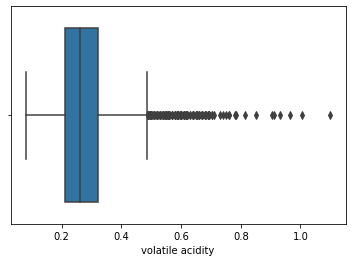

In [12]:
# Sample outlier plot
sns.boxplot(x=wine_data['volatile acidity'])
plt.show()

In [13]:
# calculate IQR score and remove outliers
wine_data['fixed acidity'] = remove_outliers_iqr(wine_data['fixed acidity'])
wine_data['volatile acidity'] = remove_outliers_iqr(wine_data['volatile acidity'])
wine_data['citric acid'] = remove_outliers_iqr(wine_data['citric acid'])
wine_data['residual sugar'] = remove_outliers_iqr(wine_data['residual sugar'])
wine_data['chlorides'] = remove_outliers_iqr(wine_data['chlorides'])
wine_data['free sulfur dioxide'] = remove_outliers_iqr(wine_data['free sulfur dioxide'])
wine_data['total sulfur dioxide'] = remove_outliers_iqr(wine_data['total sulfur dioxide'])
wine_data['density'] = remove_outliers_iqr(wine_data['density'])
wine_data['pH'] = remove_outliers_iqr(wine_data['pH'])
wine_data['sulphates'] = remove_outliers_iqr(wine_data['sulphates'])
wine_data['alcohol'] = remove_outliers_iqr(wine_data['alcohol'])

# of outliers: 1
# of outliers: 4
# of outliers: 2
# of outliers: 1
# of outliers: 79
# of outliers: 2
# of outliers: 1
# of outliers: 1
# of outliers: 0
# of outliers: 0
# of outliers: 0


**NOTE**: Removing outliers improved the performance of most of the models by about 2%. The range of the quartile was determined at 95% to not bear a great cost on the amount of observations taken from the data. In total **91 outliers were removed**.

### 4.3 drop null values
There are no nulls in our dataset.

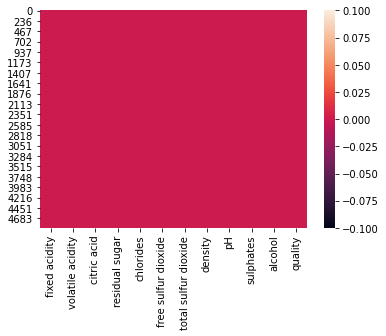

In [14]:
wine_data = wine_data.dropna()
sns.heatmap(wine_data.isnull()); # No nulls

In [15]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4810 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4810 non-null   float64
 1   volatile acidity      4810 non-null   float64
 2   citric acid           4810 non-null   float64
 3   residual sugar        4810 non-null   float64
 4   chlorides             4810 non-null   float64
 5   free sulfur dioxide   4810 non-null   float64
 6   total sulfur dioxide  4810 non-null   float64
 7   density               4810 non-null   float64
 8   pH                    4810 non-null   float64
 9   sulphates             4810 non-null   float64
 10  alcohol               4810 non-null   float64
 11  quality               4810 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 488.5 KB


### 4.4 Output to CSV
Output cleaned data to CSV for keeps. This is done because after dropping the information of the missed entries remains on the dataset and would influence a merger during feature engineering operations.


In [16]:
wine_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/white_data_cleaned.csv',index = False)

## 5. Data Exploration
This section explores the distribution of each variable using cleaned data set.

### 5.1 Visualisation and correlation helper methods

In [17]:
def plotHist(xlabel, title, column):
    fig, ax = plt.subplots(1, 1, 
                           figsize =(8, 5),  
                           tight_layout = True)

    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)

    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)

    plt.xlabel(xlabel, fontsize=16)  
    plt.ylabel("# of entries", fontsize=16)
    plt.title(title, fontsize=20)

    plt.hist(column)
    plt.show()

In [18]:
def plotBar(xlabel, title, column):
    ax = sns.barplot(column.value_counts().index, column.value_counts())

    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)

    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)

    plt.xlabel(xlabel, fontsize=16)  
    plt.ylabel("# of entries", fontsize=16)
    plt.title(title, fontsize=20)

    plt.show()

In [19]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9}, 
        ax=ax,
        annot=True, 
        linewidths=0.1, 
        vmax=1.0, 
        linecolor='white',
        annot_kws={'fontsize':14}
    )

    _.set_yticklabels(_.get_ymajorticklabels(), fontsize = 16)
    _.set_xticklabels(_.get_xmajorticklabels(), fontsize = 16)

    plt.title('Pearson Correlation of Features', y=1.05, size=20)

    plt.show()

Alcohol level:
 3.00     73
3.25    114
3.50     15
3.75      2
2.83      4
       ... 
3.56      8
3.24    131
3.43     20
3.39     39
3.20    134
Name: pH, Length: 103, dtype: int64


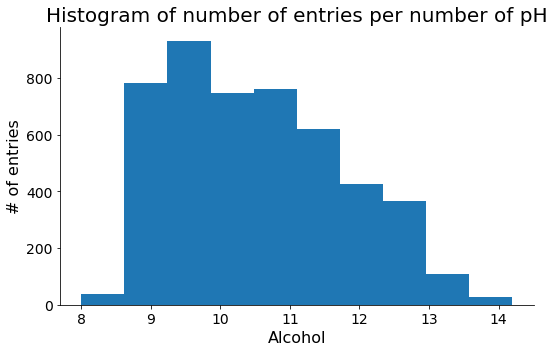

In [20]:
print('Alcohol level:\n', wine_data.pH.value_counts(sort=False));
plotHist("Alcohol", "Histogram of number of entries per number of pH", wine_data.alcohol);

pH level:
 3.00     73
3.25    114
3.50     15
3.75      2
2.83      4
       ... 
3.56      8
3.24    131
3.43     20
3.39     39
3.20    134
Name: pH, Length: 103, dtype: int64


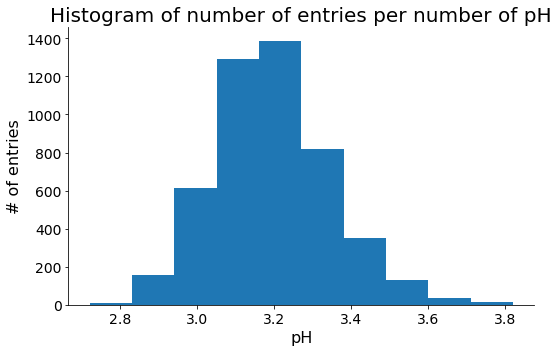

In [21]:
print('pH level:\n', wine_data.pH.value_counts(sort=False));
plotHist("pH", "Histogram of number of entries per number of pH", wine_data.pH);

### 5.2 Group

Quality:
 4     157
8     175
5    1419
9       5
6    2159
3      17
7     878
Name: quality, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


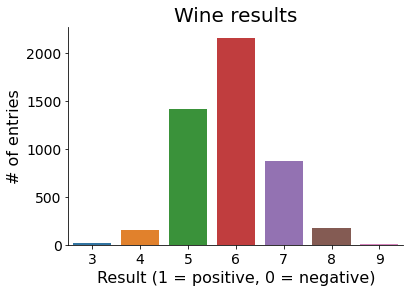

In [22]:
print('Quality:\n', wine_data['quality'].value_counts(sort=False))
plotBar("Result (1 = positive, 0 = negative)", "Wine results", wine_data['quality'])

Here we see that the response is actualy divided into 6 classes and that no variable is associated with the values 1.2

### 5.3 Correlation heatmap

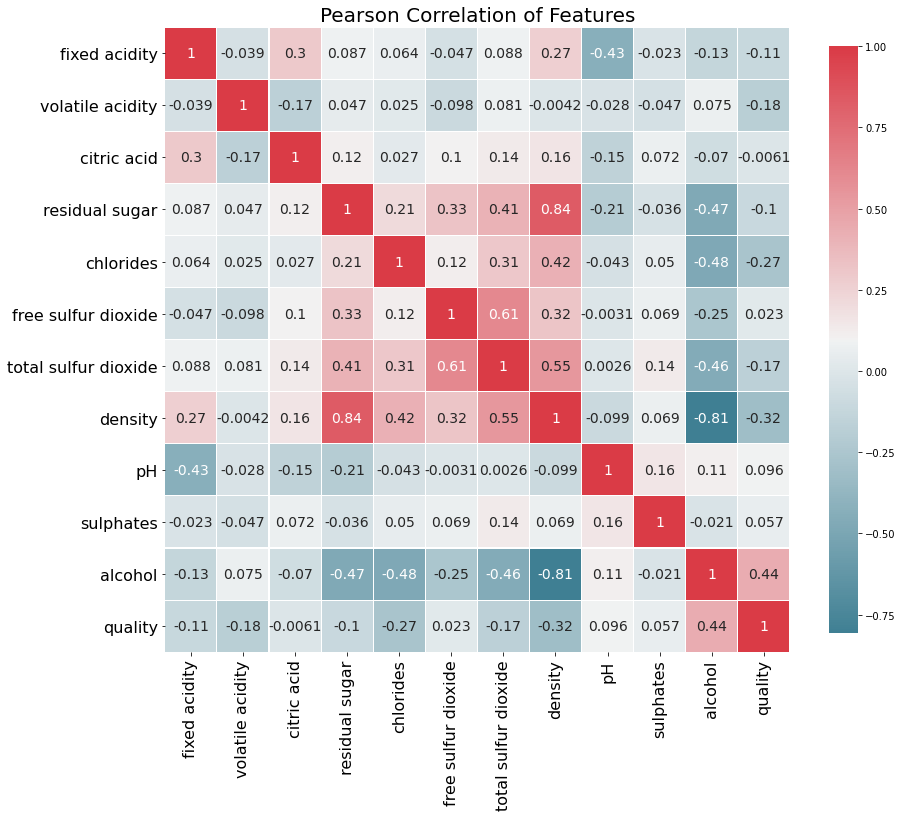

In [23]:
correlation_heatmap(wine_data)

### 5.4 Pair plot


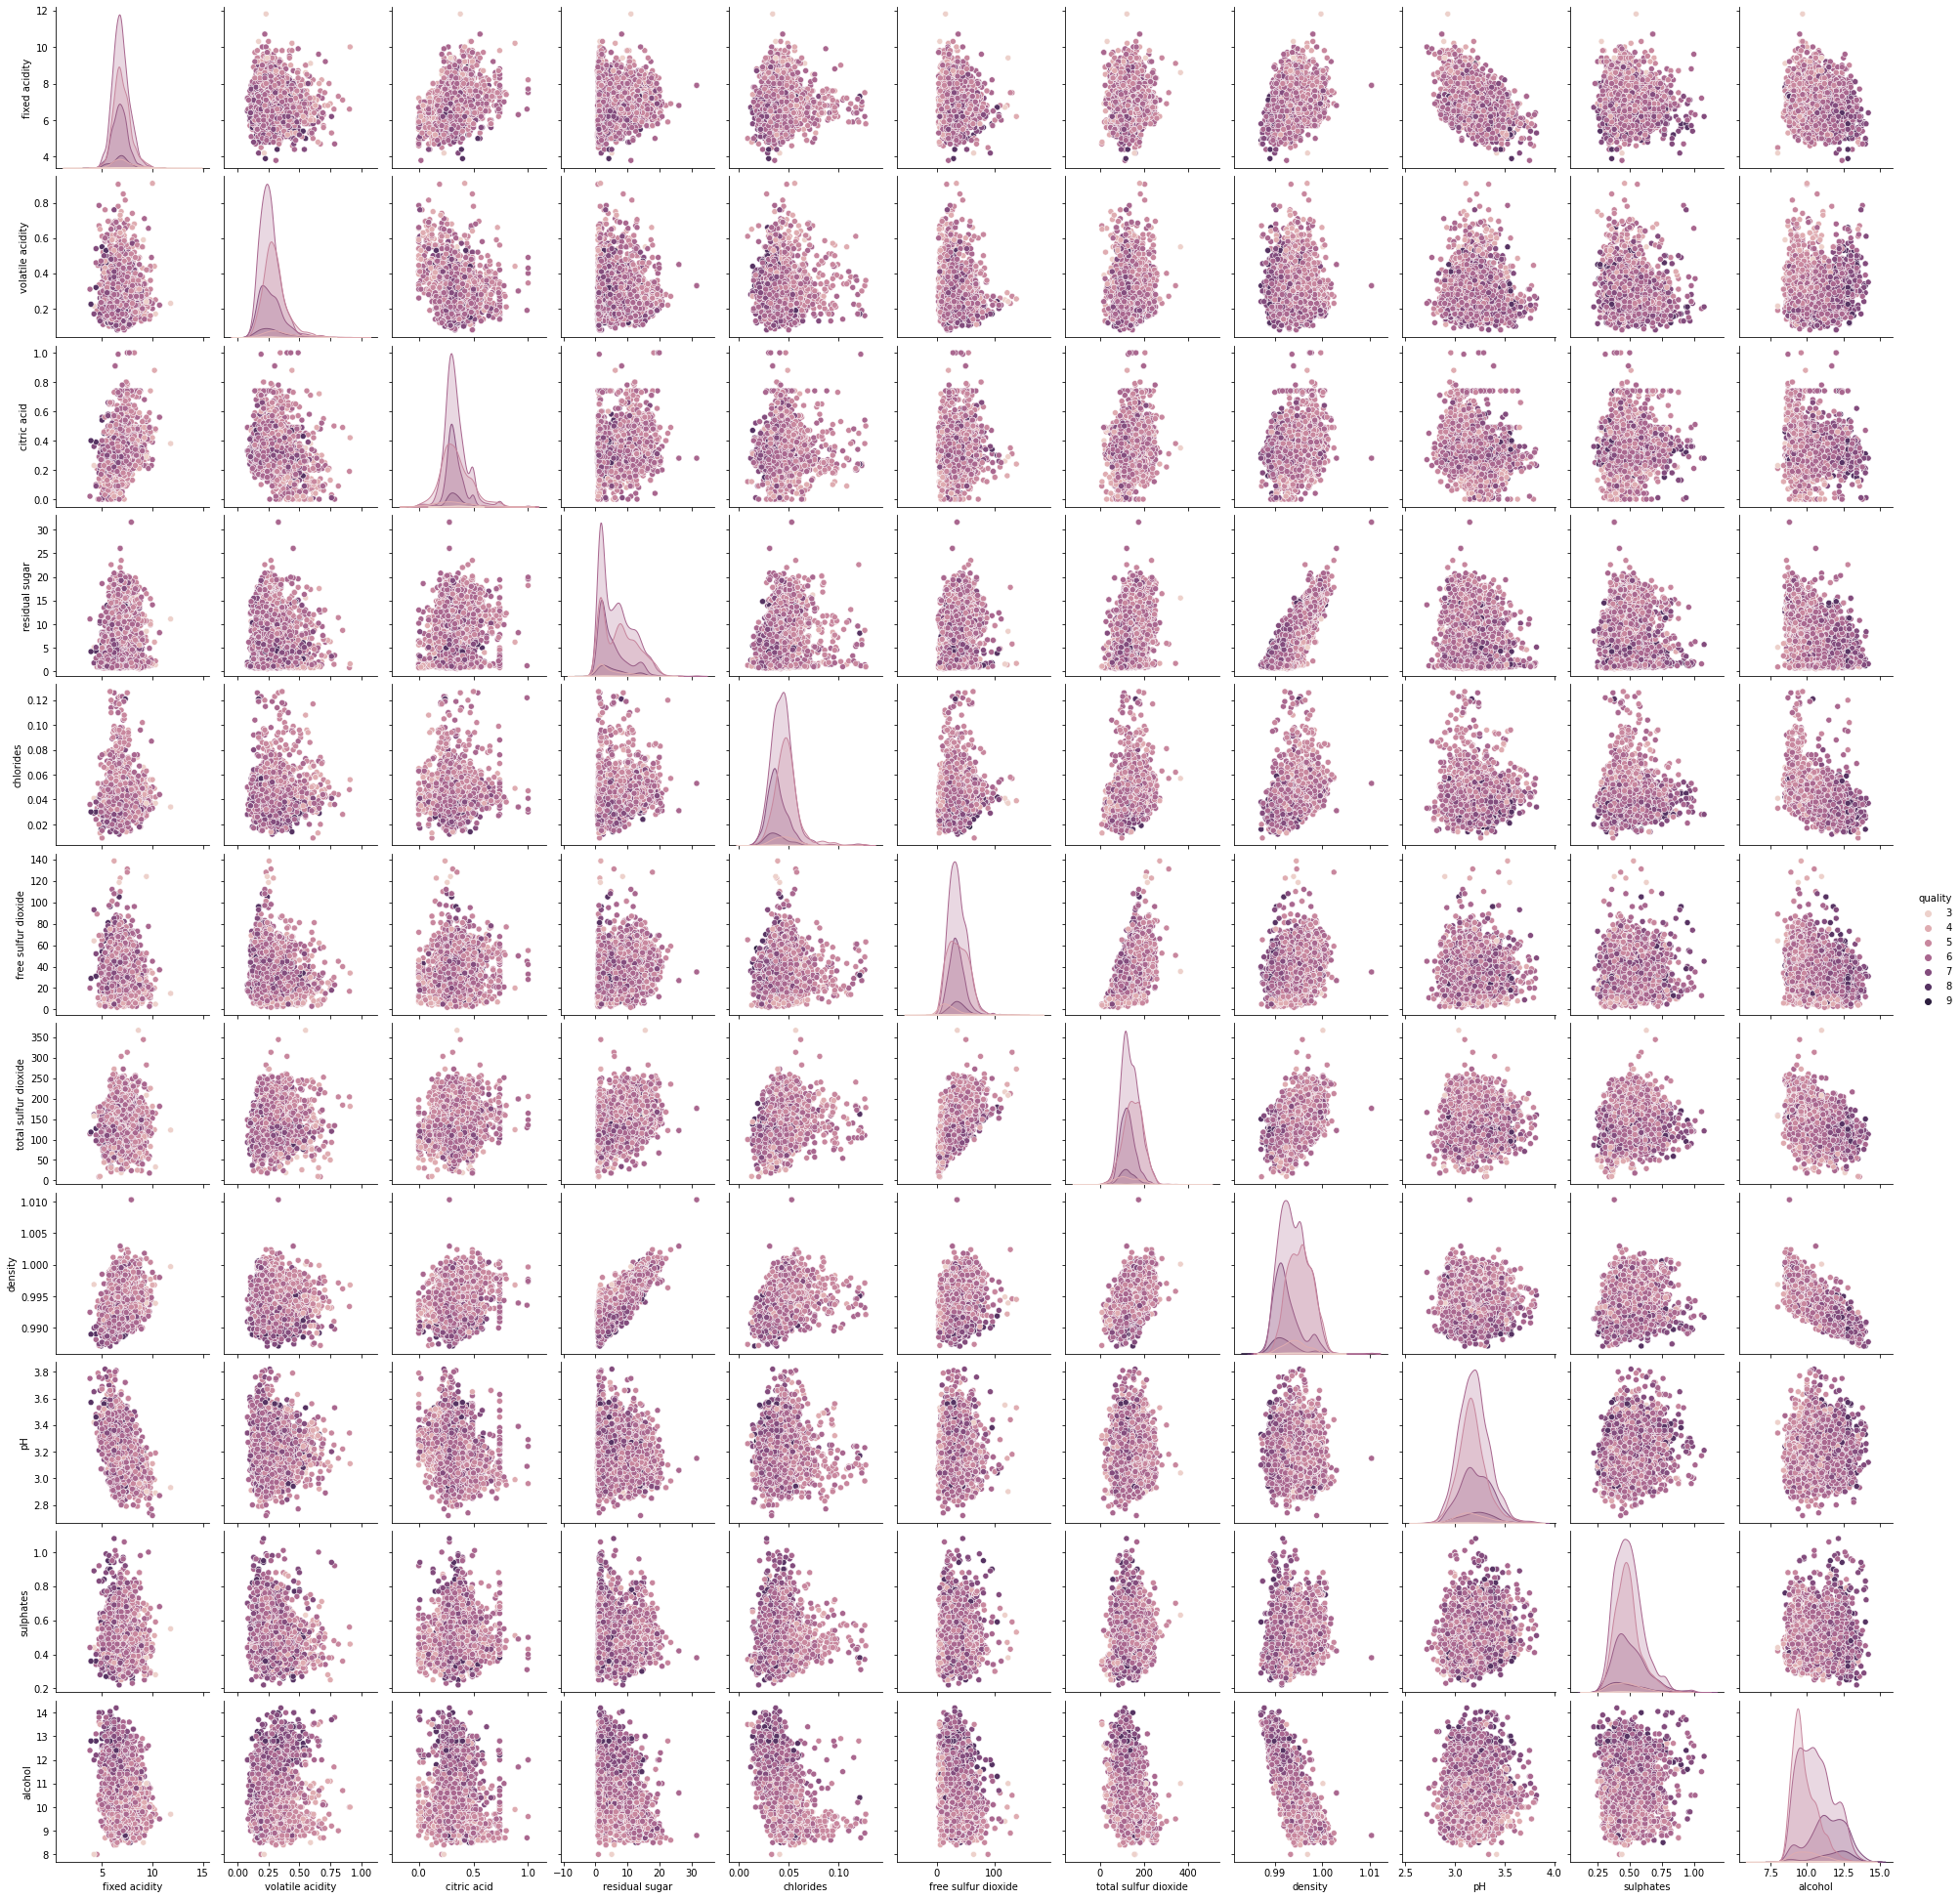

In [24]:
# sns.pairplot(wine_data, hue = 'quality')
# plt.show()

### 5.5 Pivot Table


In [25]:
# Getting my columns
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
pivot_table1 = pd.pivot_table(wine_data, index = 'quality', values = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar'])
print(pivot_table1)

pivot_table2 = pd.pivot_table(wine_data, index = 'quality', values = ['chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density'])
print(pivot_table2)

pivot_table3 = pd.pivot_table(wine_data, index = 'quality', values = ['pH', 'sulphates', 'alcohol'])
print(pivot_table3)

         citric acid  fixed acidity  residual sugar  volatile acidity
quality                                                              
3           0.340588       7.700000        6.608824          0.310294
4           0.302166       7.111465        4.605732          0.367930
5           0.335074       6.937562        7.393235          0.300648
6           0.333877       6.836823        6.480431          0.260095
7           0.325034       6.735023        5.195786          0.262944
8           0.326514       6.657143        5.671429          0.277400
9           0.386000       7.420000        4.120000          0.298000
         chlorides   density  free sulfur dioxide  total sulfur dioxide
quality                                                                
3         0.044000  0.994932            35.176471            143.382353
4         0.047522  0.994247            23.544586            124.627389
5         0.048020  0.995270            36.297393            150.859056
6         

## 6. Feature Engineering

### 6.1 Exploration of new features
Creating features which may help the decision making



### 6.1 Dataset cleaned

In [17]:
wine_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/white_data_cleaned.csv', encoding= 'unicode_escape')

### 6.2 Setting the response into four categories. 

In [18]:
# define x, y
X = wine_data.drop(['quality'], axis = 1)
y_real = wine_data['quality']

In [19]:
# Classifying the wine into four categories. 
response = []

for i in range(0,len(y_real)):
    if y_real[i] >= 8:
        response.append(4) # Excellent Wine
    elif y_real[i] < 8 and y_real[i] >= 6:
        response.append(3) # Very good
    elif y_real[i] < 6 and y_real[i] >= 4:
        response.append(2) # Fairly good wine
    else:
        response.append(1) # Bad Wine

In [20]:
y = np.array(response)

In [21]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [22]:
# Quick check using Support Vector Machine
from sklearn.svm import SVC
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)
regressor = SVC(gamma='auto')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('The MSE for the SVM is: ', metrics.mean_squared_error(y_test, y_pred))

The MSE for the SVM is:  0.28794178794178793


### 6.3 New features

In [23]:
X['alcohol_square'] = X['alcohol']*X['alcohol']
X['sulphates_square'] = X['pH']*X['sulphates']

In [24]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,alcohol_square,sulphates_square
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,77.44,1.3500
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,90.25,1.6170
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,102.01,1.4344
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,98.01,1.2760
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,98.01,1.2760


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4810 non-null   float64
 1   volatile acidity      4810 non-null   float64
 2   citric acid           4810 non-null   float64
 3   residual sugar        4810 non-null   float64
 4   chlorides             4810 non-null   float64
 5   free sulfur dioxide   4810 non-null   float64
 6   total sulfur dioxide  4810 non-null   float64
 7   density               4810 non-null   float64
 8   pH                    4810 non-null   float64
 9   sulphates             4810 non-null   float64
 10  alcohol               4810 non-null   float64
 11  alcohol_square        4810 non-null   float64
 12  sulphates_square      4810 non-null   float64
dtypes: float64(13)
memory usage: 488.6 KB


In [26]:
# Quick check using Logistic regression
from sklearn.svm import SVC
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)
regressor = SVC(gamma='auto')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('The MSE for the SVM is: ',metrics.mean_squared_error(y_test, y_pred))

The MSE for the SVM is:  0.2733887733887734


In [27]:
# Some feature Engineering
# wine_data['alcohol'].unique()
new_data = [1]

for i in range(0,len(X)-1):
    if X.iloc[i,10] >= 9.0:
        new_data.append(0)
    elif X.iloc[i,10] > 9.0 and X.iloc[i,10] < 12.0:
        new_data.append(1)
    else:
        new_data.append(2)

In [28]:
new_data = pd.DataFrame(new_data)

In [29]:
new_data.columns = ['Category']

In [30]:
new_data['Category'] = new_data.Category.astype('category')

In [31]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Category  4810 non-null   category
dtypes: category(1)
memory usage: 4.9 KB


In [32]:
new_data.describe(include="all")

,Category
count,4810
unique,3
top,0
freq,4494


In [33]:
X = pd.concat([X, pd.DataFrame(new_data)], axis=1) # X.describe(include="all")

In [34]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,alcohol_square,sulphates_square,Category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,77.44,1.3500,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,90.25,1.6170,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,102.01,1.4344,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,98.01,1.2760,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,98.01,1.2760,0


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4810 non-null   float64 
 1   volatile acidity      4810 non-null   float64 
 2   citric acid           4810 non-null   float64 
 3   residual sugar        4810 non-null   float64 
 4   chlorides             4810 non-null   float64 
 5   free sulfur dioxide   4810 non-null   float64 
 6   total sulfur dioxide  4810 non-null   float64 
 7   density               4810 non-null   float64 
 8   pH                    4810 non-null   float64 
 9   sulphates             4810 non-null   float64 
 10  alcohol               4810 non-null   float64 
 11  alcohol_square        4810 non-null   float64 
 12  sulphates_square      4810 non-null   float64 
 13  Category              4810 non-null   category
dtypes: category(1), float64(13)
memory usage: 493.4 KB


In [36]:
# Quick check using Logistic regression
from sklearn.svm import SVC
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)
regressor = SVC(gamma='auto')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('The MSE for the SVM is: ',metrics.mean_squared_error(y_test, y_pred))

The MSE for the SVM is:  0.2713097713097713


In [37]:
X['normalized'] = (X['residual sugar'] - X['residual sugar'].min()) / (X['residual sugar'].max() - X['residual sugar'].min())
X['alcohol_normalized'] = (X['alcohol'] - X['alcohol'].min()) / (X['alcohol'].max() - X['alcohol'].min())

In [38]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,alcohol_square,sulphates_square,Category,normalized,alcohol_normalized
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,77.44,1.3500,1,0.648387,0.129032
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,90.25,1.6170,2,0.032258,0.241935
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,102.01,1.4344,0,0.203226,0.338710
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,98.01,1.2760,0,0.254839,0.306452
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,98.01,1.2760,0,0.254839,0.306452


In [39]:
# Quick check using Logistic regression
from sklearn.svm import SVC
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)
regressor = SVC(gamma='auto')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('The MSE for the SVM is: ',metrics.mean_squared_error(y_test, y_pred))

The MSE for the SVM is:  0.2681912681912682


<span style="color:red">**Important Note**</span> <br>
<span style="color:red">From the quick checks using SVM which is quick in its process, we can see a slight reduction in the MSE . Therefore, though these steps in feature engineering seem to brings some improvement in the fit of the model, it still does  not considerably improve the trend in the results. The next steps will be to evaluate other evaluation models.</span>

### 6.4 Model Selection
From model chart here, we can see that the categorical feature added through feature engineering does not improve the model. This will therefore not be included in our result. 
We will also observed, if a small subset of more correlated features will not be sufficient to predict the class.

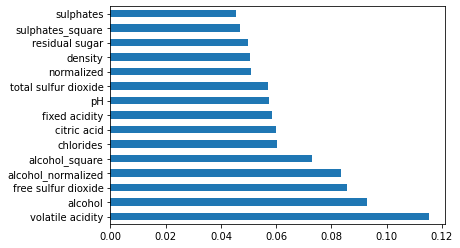

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)
feat_importance = pd.Series(etr.feature_importances_, index=X.columns)
feat_importance.nlargest(15).plot(kind='barh')
plt.show()

<span style="color:red">**Important Note**</span> <br>
<span style="color:red">A subset of correlated features without those from feature engineering will be used to improve the accuracy of the model.</span>

In [41]:
# define x, y
# X = wine_data.drop(['quality'], axis = 1) 
# X = X.drop(['Category', 'density', 'normalized', 'fixed acidity', 'alcohol_normalized'], axis = 1)

### 6.5 Split into Training and Testing Data

In [42]:
# split into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)

In [43]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(ExtraTreesRegressor(), threshold= 0.04)
sel.fit(X_train, y_train)
selected_feat = X_train.columns[(sel.get_support())]
print('The number of selected features:', len(selected_feat))
print('The selected features are:', pd.DataFrame(selected_feat))

The number of selected features: 15
The selected features are:                        0
0          fixed acidity
1       volatile acidity
2            citric acid
3         residual sugar
4              chlorides
5    free sulfur dioxide
6   total sulfur dioxide
7                density
8                     pH
9              sulphates
10               alcohol
11        alcohol_square
12      sulphates_square
13            normalized
14    alcohol_normalized


## 7. Model Building
Train the models and use cross validation score for the accuracy.

* Naive Bayes
* Logistic regression
* K-Nearest Neighbors
* Decision Tree
* Bagging
* Gardient Boosting
* RandomForest


### 7.1 Naive Bayes



In [71]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
cv = cross_val_score(nb, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.6038961  0.54805195 0.59220779 0.60078023 0.59817945]
0.5886231064124432


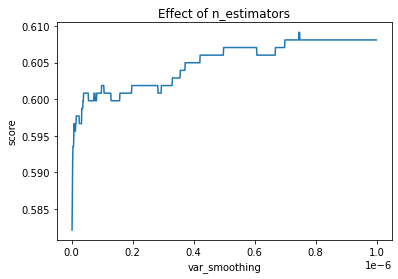

In [72]:
estimators = np.arange(1e-09, 1e-06, 1e-09)
scores1 = []
for n in estimators:
    nb.set_params(var_smoothing=n)
    nb.fit(X_train, y_train)
    scores1.append(nb.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("var_smoothing")
plt.ylabel("score")
plt.plot(estimators, scores1);

In [73]:
print('Accuracy Score: {}'.format(round(scores1[np.argmax(scores1)], 3)))
print('best Regularization of var_smoothing: {}'.format(round(np.arange(1e-09, 1e-06, 1e-09)[np.argmax(scores1)],10)))

Accuracy Score: 0.609
best Regularization of var_smoothing: 7.45e-07



### 7.2 Logistic Regression

In [56]:
lr = LogisticRegression(max_iter = 100000)
cv = cross_val_score(lr, X_train, y_train,cv=5)
print(cv)
print(cv.mean())

[0.74545455 0.71428571 0.72207792 0.68920676 0.72301691]
0.7188083697836624


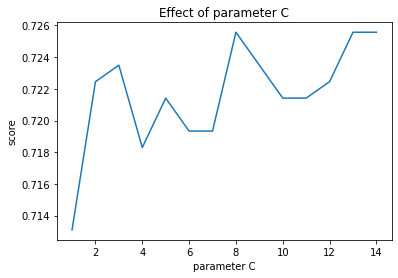

In [57]:
estimators = np.arange(1, 15, 1)
scores1 = []
for n in estimators:
    lr.set_params(C=n)
    lr.fit(X_train, y_train)
    scores1.append(lr.score(X_test, y_test))
plt.title("Effect of parameter C")
plt.xlabel("parameter C")
plt.ylabel("score")
plt.plot(estimators, scores1);

In [58]:
print('Accuracy Score: {}'.format(round(scores1[np.argmax(scores1)], 3)))
print('best Regularization parameter C: {}'.format(round(np.arange(1, 10, 1)[np.argmax(scores1)],2)))

Accuracy Score: 0.726
best Regularization parameter C: 8


### 7.3 K-Neaserst Neighbors



In [74]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
cv = cross_val_score(KNN, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.68441558 0.68831169 0.66623377 0.69180754 0.66840052]
0.6798338202759528


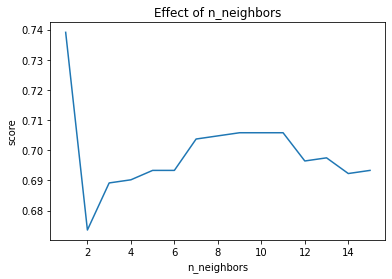

In [75]:
estimators = np.arange(1, 16, 1)
scores1 = []
for n in estimators:
    KNN.set_params(n_neighbors=n)
    KNN.fit(X_train, y_train)
    scores1.append(KNN.score(X_test, y_test))
plt.title("Effect of n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(estimators, scores1);

In [76]:
print('Accuracy Score: {}'.format(round(scores1[np.argmax(scores1)], 3)))
print('best Regularization n_neighbors: {}'.format(round(np.arange(1, 16, 1)[np.argmax(scores1)],2)))

Accuracy Score: 0.739
best Regularization n_neighbors: 1


<span style="color:red">**Important Note**</span> <br>
<span style="color:red">The best models here are the random forest and the gradient boosting algorithm. Therefore the next section will look into these three algorithms
1. Decision Tree
2. Random Forest
3. Gradient Boosting
</span>

### 7.4 Decision Tree


In [59]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.72467532 0.7038961  0.6961039  0.73211964 0.73602081]
0.7185631533615929


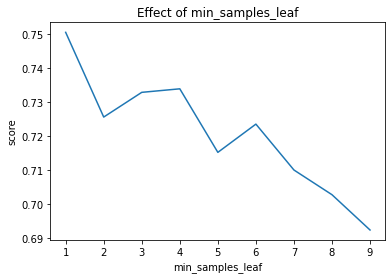

In [60]:
estimators = np.arange(1, 10, 1)
scores1 = []
for n in estimators:
    dt.set_params(min_samples_leaf=n)
    dt.fit(X_train, y_train)
    scores1.append(dt.score(X_test, y_test))
plt.title("Effect of min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.plot(estimators, scores1);

In [61]:
print('Accuracy Score: {}'.format(round(scores1[np.argmax(scores1)], 3)))
print('best Regularization parameter min_samples_leaf: {}'.format(round(np.arange(1, 10, 1)[np.argmax(scores1)],2)))

Accuracy Score: 0.751
best Regularization parameter min_samples_leaf: 1


### 7.5 Bagging



In [65]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(dt, random_state=1)
cv = cross_val_score(bag, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75714286 0.74675325 0.75194805 0.73862159 0.74122237]
0.7471376218060224


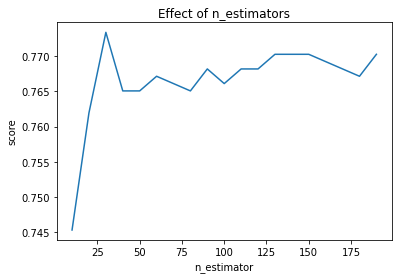

In [66]:
estimators = np.arange(10, 200, 10)
scores1 = []
for n in estimators:
    bag.set_params(n_estimators=n)
    bag.fit(X_train, y_train)
    scores1.append(bag.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores1);

In [67]:
print('Accuracy Score: {}'.format(round(scores1[np.argmax(scores1)], 3)))
print('best Regularization n_estimators: {}'.format(round(np.arange(10, 200, 10)[np.argmax(scores1)],2)))

Accuracy Score: 0.773
best Regularization n_estimators: 30


### 7.6 Gradient Boosting



In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=1)
cv = cross_val_score(gb, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76753247 0.76753247 0.76233766 0.74642393 0.75812744]
0.760390792562444


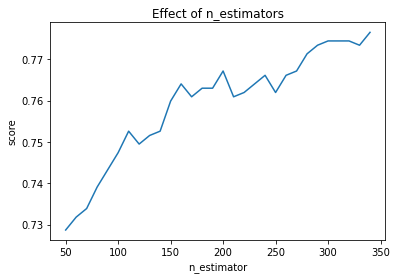

In [69]:
estimators = np.arange(50, 350, 10)
scores1 = []
for n in estimators:
    gb.set_params(n_estimators=n)
    gb.fit(X_train, y_train)
    scores1.append(gb.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores1);

In [70]:
print('Accuracy Score: {}'.format(round(scores1[np.argmax(scores1)], 3)))
print('best Regularization n_estimators: {}'.format(round(np.arange(50, 350, 10)[np.argmax(scores1)],2)))

Accuracy Score: 0.777
best Regularization n_estimators: 340


### 7.7 Random Forest



In [59]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.81948052 0.80519481 0.78311688 0.79843953 0.81274382]
0.803795112559742


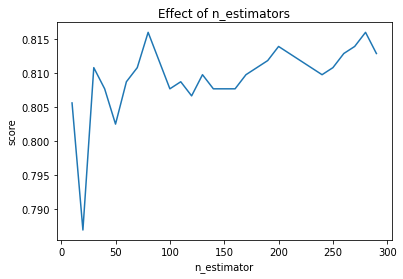

In [60]:
estimators = np.arange(10, 300, 10)
scores1 = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    y_predict = rf.predict(X_test)
    scores1.append(accuracy_score(y_test, y_predict))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores1);

In [61]:
print('Accuracy Score: {}'.format(round(scores1[np.argmax(scores1)], 3)))
print('best Regularization parameter estimators: {}'.format(round(np.arange(10, 300, 10)[np.argmax(scores1)],2)))

Accuracy Score: 0.816
best Regularization parameter estimators: 80


## 8. More Hyperparameter Tuning


### 8.1 Decision Tree
* `criterion` : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

* `max_depth` : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).


In [77]:
gini_acc_scores = []
entropy_acc_scores = []

criterions = ["gini", "entropy"]

for criterion in criterions:
    for depth in range(25):
        dt = tree.DecisionTreeClassifier(criterion=criterion, max_depth = depth+1, random_state=depth)
        model = dt.fit(X_train,y_train)

        y_predict = dt.predict(X_test)

        if criterion == "gini":
            gini_acc_scores.append(accuracy_score(y_test, y_predict))
        else:
            entropy_acc_scores.append(accuracy_score(y_test, y_predict))

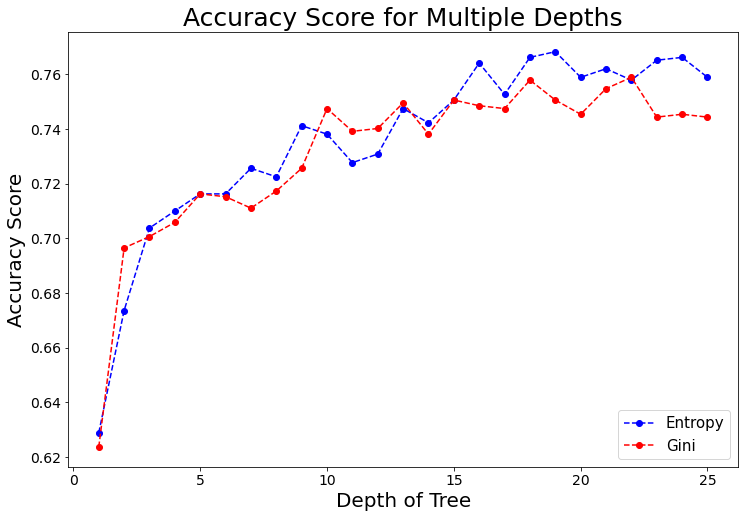

Gini max accuracy: 0.7588357588357588
Entropy max accuracy: 0.7681912681912682


In [78]:
figuresize = plt.figure(figsize=(12,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
EntropyAcc = plt.plot(np.arange(25)+1, entropy_acc_scores, '--bo')   
GiniAcc = plt.plot(np.arange(25)+1, gini_acc_scores, '--ro')
legend = plt.legend(['Entropy', 'Gini'], loc ='lower right',  fontsize=15)
title = plt.title('Accuracy Score for Multiple Depths', fontsize=25)
xlab = plt.xlabel('Depth of Tree', fontsize=20)
ylab = plt.ylabel('Accuracy Score', fontsize=20)

plt.show()

print("Gini max accuracy:", max(gini_acc_scores))
print("Entropy max accuracy:", max(entropy_acc_scores))

In [91]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 22, random_state = 1)
dt = dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 0.7723492723492723


### 8.2 Random forest Multi-hyperparameter tuning
The results indicate that the other hyperparameters do not significantly improve the prediction. The hyperparameters of importance are the number of estimators and the depth of the tree

In [92]:
[int(x) for x in np.linspace(start = 100, stop = 300, num = 10)]

[100, 122, 144, 166, 188, 211, 233, 255, 277, 300]

In [93]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 25)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(25, 35, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True] # You want to use this
# Create the random grid

In [94]:
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth#,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
              }
print(random_grid)

{'n_estimators': [100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 289, 291, 293, 295, 297, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [25, 27, 30, 32, 35, None]}


In [95]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 5, n_jobs = -1, verbose = 2)

In [96]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 50.1min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 63.2min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 79.1min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 95.4min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 113.4min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 117.9min finished


{'max_depth': 25, 'max_features': 'auto', 'n_estimators': 215}

In [97]:
def evaluate(model, test_features, test_labels):
    y_pred_rf = model.predict(test_features)
    errors = abs(y_pred_rf - test_labels)
    # check for score
    accuracy = accuracy_score(y_test, y_pred_rf)
    
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy_score

In [98]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.1923 degrees.
Accuracy = 0.81%.


The results indicate that the other hyperparameters do not significantly improve the prediction.


### 8.3 Fine tuning the Random Forest Classifier

In [62]:
acc_scores = []              
depth = [int(x) for x in np.arange(1, 35, 1)]
depth.append(None)

for i in depth:
    rf = RandomForestClassifier(n_estimators=80, max_depth=i, random_state=1)
    rf.fit(X_train,y_train)
    y_predict = rf.predict(X_test)
    acc_scores.append(rf.score(X_test, y_test)) 

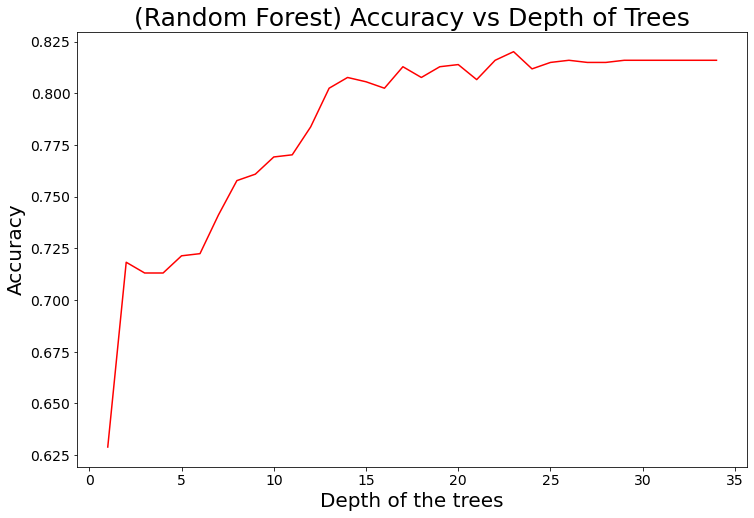

In [68]:
figsize = plt.figure(figsize = (12,8))
plot = plt.plot(depth, acc_scores, 'r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
xlab = plt.xlabel('Depth of the trees', fontsize = 20)
ylab = plt.ylabel('Accuracy', fontsize = 20)
title = plt.title('(Random Forest) Accuracy vs Depth of Trees', fontsize = 25)
plt.show()

In [67]:
rf = RandomForestClassifier(n_estimators=80, max_depth=acc_scores.index(max(acc_scores))+1, random_state=1)
rf.fit(X_train,y_train)

y_predict = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 0.8201663201663202



### 8.4 Tuning the Gradient Boosting Classifier

In [74]:
acc_scores = []              
depth = np.arange(1, 16)

for i in depth:
    rf = GradientBoostingClassifier(n_estimators=400, max_depth=i, random_state=1)
    rf.fit(X_train,y_train)
    y_predict = rf.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_predict)) 

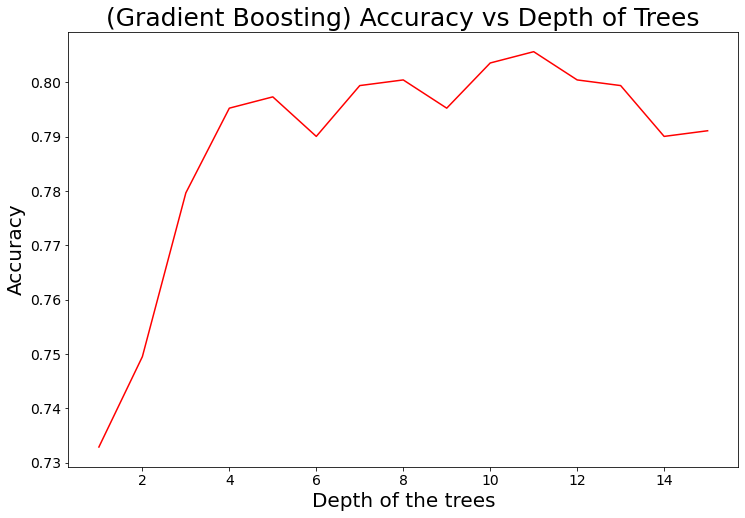

In [75]:
figsize = plt.figure(figsize = (12,8))
plot = plt.plot(depth, acc_scores, 'r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
xlab = plt.xlabel('Depth of the trees', fontsize = 20)
ylab = plt.ylabel('Accuracy', fontsize = 20)
title = plt.title('(Gradient Boosting) Accuracy vs Depth of Trees', fontsize = 25)
plt.show()

In [76]:
rf = GradientBoostingClassifier(n_estimators=340, max_depth=acc_scores.index(max(acc_scores))+1, random_state=1)
rf.fit(X_train,y_train)

y_predict = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 0.8056133056133056


# Conclusion:

From the following analysis we have done the following. 
* Created an appropriate response classification for the model
*  Reduced the MSE error using various form of feature engineering techniques
* Identified highly correlated features to the response.
* Identified best performing algorithms which are
  1. Decision Tree
  2. Gradient Boosting
  3. Random Forest
* Taken the time to tune the hyparameters for these methods

The results of the intricate fine-tuned hyper-parameters indicate the following:

  1. Decision tree: Classification accuracy from 75.1% to 76.8%
  2. Gradient Boosting: Classification accuracy from 77.7% to 80.05%
  3. Random Forest: Classification accuracy from 81.6% to 82%

# END